In [1]:
import numpy as np

import scipy.sparse as sp # sparse matrix
import scipy.io as sio
import scipy as sci
import scipy.optimize as op#import minimize
from scipy.integrate import odeint
from scipy import stats

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import  scipy.integrate as integ

import csv as csv 
import math as math
from sklearn.metrics import mean_squared_error

import pandas as pd   
import seaborn as sn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import os
from pymcmcstat.MCMC import MCMC
from pymcmcstat.plotting import MCMCPlotting
import pymcmcstat
print(pymcmcstat.__version__)
np.seterr(over='ignore');

import dateutil as dt

# pour introduire les parametres
from lmfit import  Parameters, Parameter

import json

import covid as cv



1.9.0
1.9.0


In [2]:
def import_data(index = 212, start = 4):
    #importing global data
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
    confirmed_global = pd.read_csv(url, error_bad_lines=False)
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
    deaths_global = pd.read_csv(url, error_bad_lines=False)
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
    recovered_global = pd.read_csv(url, error_bad_lines=False)
    #extract data for Tunisia (or any other country when changing the index)
    #index = 212 # Tunisia's index in the dataset
    #start = 4 #remove the region columns to start from the first date in the dataset
    confirmed = confirmed_global.iloc[index,start:]
    deaths = deaths_global.iloc[index,start:]
    recovered = recovered_global.iloc[index,start:]
    d = {'confirmed': confirmed, 'deaths': deaths,'recovered': recovered}
    d = pd.DataFrame(d)
    d =d[d.confirmed != 0] # removing dates where there are no confirmed cases: dataset starts with the first confirmed case
    d = d.rename_axis('date').reset_index()
    return d

In [3]:
tn = import_data(212,4)
tn

,date,confirmed,deaths,recovered
0,3/4/20,1,0,0
1,3/5/20,1,0,0
2,3/6/20,1,0,0
3,3/7/20,1,0,0
4,3/8/20,2,0,0
5,3/9/20,2,0,0
6,3/10/20,5,0,0
7,3/11/20,7,0,0
8,3/12/20,7,0,0
9,3/13/20,16,0,0


covid.py has predefined functions that we are going to use next for plots and modeling


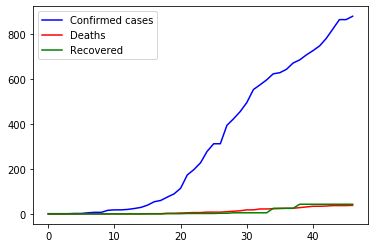

In [4]:
ddata = cv.data(data=tn,t_change=24)#24
ddata.plotData()

The cumulative number of reported symptomatic infectious cases at time t, denoted by $CR(t)$, is assumed to be:

$$ CR(t) = \chi_1 \exp(\chi_2 t) - \chi_3 $$

we fit the parameters and calulate goodness of fit measures

In [5]:
ddata.estimates_goodness()

The CR exponential growth parameters
x1=1.519
x2=0.220
x3=0.757
t0=-3.172
Goodness of fit measures
R2 =  0.9915408024133986
explained variance score 0.9916117601778949
MSE =  34.84102011443714


In [6]:
ddata.regression_report()

   Coefficients  Standard Errors  t values  P-values
0        0.2857            0.083     3.441  0.002225
1        0.2276            0.006    36.796  0.000000


We apply a t-test for the parameters $\chi_1, \chi_2$ and we obtain very small p_values. Hence, we reject H0 that $\chi_1 = 0$ and $\chi_2 =0$.

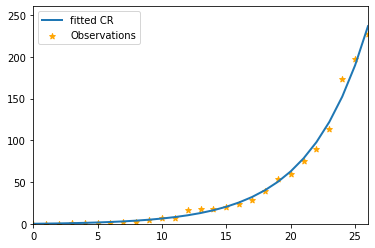

In [7]:
ddata.plot_CR()

Figure: fitted CR vs. real cumulative confimed cases in Tunisia

/home/slimane/biologie/corona/modelSAsymIR/simulation/covid.py:225: RuntimeWarning: divide by zero encountered in log
  log_obs[i] = np.log(obs1[i])


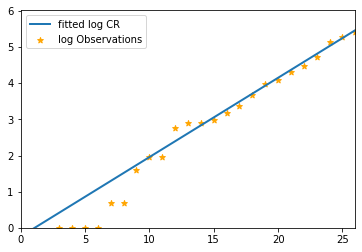

In [8]:
ddata.plot_logCR()    

Figure: fitted $\log(CR(t)+\chi_3)$ vs. real log. of cumulative confimed cases in Tunisia

In [9]:
ddata.preds_CR()

,date,predictions,observations
24,3/28/20,295.104773,278
25,3/29/20,367.786863,312
26,3/30/20,458.324231,312
27,3/31/20,571.103252,394
28,4/1/20,711.587870,423
29,4/2/20,886.584316,455
30,4/3/20,1104.570858,495
31,4/4/20,1376.108559,553
32,4/5/20,1714.352939,574
33,4/6/20,2135.691342,596


Donnée du covid 19

In [10]:
covidParams = Parameters()
with open('covidParam.txt', 'r') as fd:
      covidParams.load(fd)

corona1=cv.SAsIQR(beta=covidParams['beta'].value,tau1=covidParams['tau1'].value,tau2=covidParams['tau2'].value,gama=covidParams['gama'].value,
            mu=covidParams['mu'].value,alpha1=covidParams['alpha1'].value,f=covidParams['f'].value,start_conf=covidParams['start_conf'].value,
             efficacite_Conf=covidParams['efficacite_Conf'].value ,confinement_hour=covidParams['confinement_hour'].value)

y0,t0,res=corona1.calc_params(ddata)


In [11]:
t0

-3.172195123067044

Donnée d'integration

In [12]:
tmax=28#len(ddata.Cases)
dt=float(1./24) # par tranche de 6 h   
timeSet=np.arange(t0,tmax,dt) 

## Priode 1

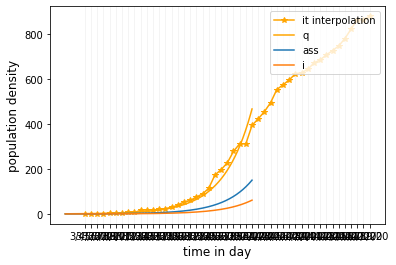

Epidemimiological pic = 26, I+Q=528, Death num D=8 



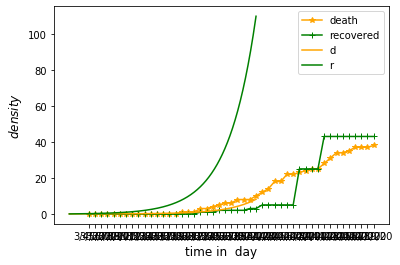

In [13]:

tmaxPerd1=covidParams['start_conf'].value
timeSet1=np.arange(t0,tmaxPerd1,dt)  


#plt.plot(aa, np.vectorize(corona.f2)(1,1,1,aa))    
time1 , res1=corona1.calSol(timeSet1,y0)
corona1.plotSAsQI(ddata,timeSet1)

corona1.plotRD(ddata,timeSet1)

dd=int(np.max(corona1.d))*np.ones(4)

## Periode 2

### Initialisation

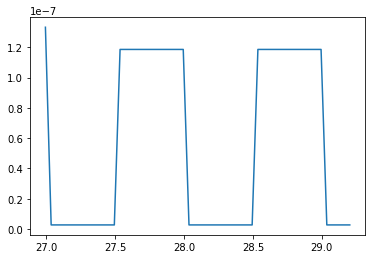

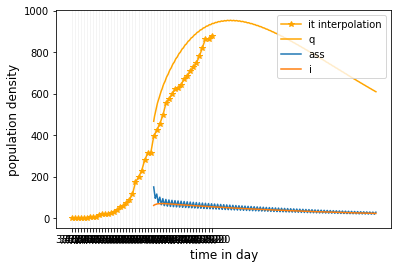

Epidemimiological pic = 51, I+Q=1003, Death num D=220 



In [14]:
tmaxPerd2=100
timeSet2=np.arange(np.max(timeSet1),tmaxPerd2,dt)



#start_conf=np.infty
#              efficacite_Conf=efficacite_Conf) 


   
ass0=corona1.ass[-1]#/ddata.popNumber#1/100
i0= corona1.i[-1]
q0=corona1.q[-1]
d0=corona1.d[-1]
r0=corona1.r[-1]
s0=ddata.population-(ass0+i0+q0+d0+r0)#1.-(ass0+i0+q0+d0+r0) #if s<0.2 else 0

#################
#param=(beta,tau1,tau2) 
y0=[s0,ass0,i0,q0,d0,r0]




corona2=cv.SAsIQR(beta=covidParams['beta'].value,tau1=covidParams['tau1'].value,tau2=covidParams['tau2'].value,gama=covidParams['gama'].value,
            mu=covidParams['mu'].value,alpha1=covidParams['alpha1'].value,f=covidParams['f'].value,start_conf=covidParams['start_conf'].value,
             efficacite_Conf=covidParams['efficacite_Conf'].value ,confinement_hour=covidParams['confinement_hour'].value)



yy0,t0,res=corona2.calc_params(ddata)

plt.plot(timeSet2[:54], np.vectorize(corona2.f2)(1,1,1,timeSet2[:54]))   

time3_1 , res3_1=corona2.calSol(timeSet2,y0)

corona2.plotSAsQI(ddata,time3_1)





### Même parametre de la période 1

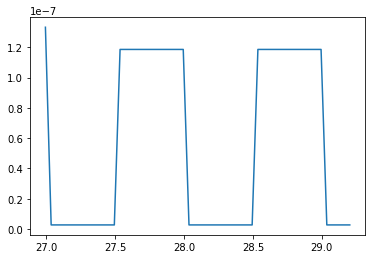

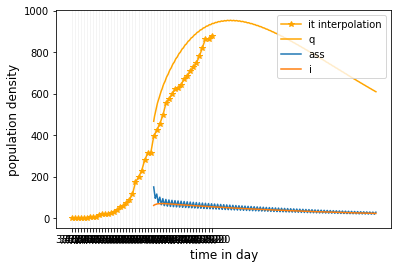

Epidemimiological pic = 51, I+Q=1003, Death num D=220 



In [15]:

####################
## Sans rien changer
##

#efficacite_Conf=0.25#258


plt.plot(timeSet2[:54], np.vectorize(corona2.f2)(1,1,1,timeSet2[:54]))   

time3_1 , res3_1=corona2.calSol(timeSet2,y0)

corona2.plotSAsQI(ddata,time3_1)
dd[0]+=int(max(corona2.d))





### Scénario 1
 Augmentation du couvre feux de 6 h

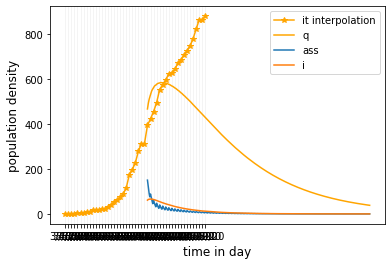

Epidemimiological pic = 30, I+Q=638, Death num D=76 



In [16]:
#corona2.efficacite_Conf=0#258
corona2.confinement_hour=6


time3_2 , res3_2=corona2.calSol(timeSet2,y0)
#corona2.plotSol(ddata,timeSet2)

corona2.plotSAsQI(ddata,time3_2)

#aa=np.arange(25,30,dt)
#plt.plot(aa, np.vectorize(corona2.f2)(1,1,1,aa),aa, np.vectorize(corona2.f2)(1,1,1,aa))    

dd[1]+=int(max(corona2.d))

### Scénarion 2
Augmentation du couvre feux de 6 h et de la pression de confinement a 0.75 et doublement de la pression du coufinement

In [17]:
corona2.efficacite_Conf=0.04/2
#258
corona2.confinement_hour=6

time3_3 , res3_3=corona2.calSol(timeSet2,y0)
#corona2.plotSol(ddata,timeSet2)

dd[2]+=int(max(corona2.d))


### Scénarion 3
Augmentation  de la pression de confinement de 2 fois

In [18]:
#258
corona2.confinement_hour=12

time3_3 , res3_3=corona2.calSol(timeSet2,y0)
#corona2.plotSol(ddata,timeSet2)

dd[2]+=int(max(corona2.d))


### PLot des résultats

In [19]:
#corona2.efficacite_Conf=1#25
corona2.confinement_hour=12

time3_4 , res3_4=corona2.calSol(timeSet2,y0)

dd[3]+=int(max(corona2.d))

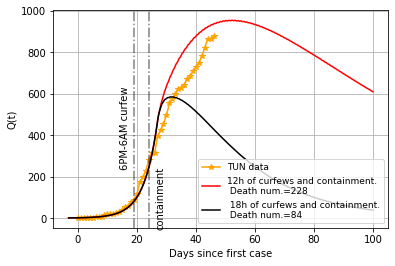

In [20]:
resSR = pd.concat([pd.DataFrame(res1),pd.DataFrame(res3_1)])
resCV = pd.concat([pd.DataFrame(res1),pd.DataFrame(res3_2)])
resCo = pd.concat([pd.DataFrame(res1),pd.DataFrame(res3_4)])
resCo_CV = pd.concat([pd.DataFrame(res1),pd.DataFrame(res3_3)])

time=np.concatenate((time1,time3_1))
############################################
#   Anglaise
#


fig, ax = plt.subplots()

ax.plot(np.arange(len(ddata.date)),ddata.confirmed,c='orange',marker='*',label='TUN data')
#line0,=ax.plot(time [:len(res)],res[:,2]+res[:,3],c='r')
ax.plot(time,resSR[3],c='r',label='12h of curfews and containment.\n Death num.='+str(int(dd[0])))
ax.plot(time,resCV[3],label=' 18h of curfews and containment.\n Death num.='+str(int(dd[1])), c='black')
#line4,=ax.plot(time,resCo[3],label='pression de conf. aug. de 25%.\n Nbre décès='+str(dd[3]))
#line3,=ax.plot(time,resCo_CV[3],label='couvre-feu de 18h et pression \n de conf. aug. 25%.  Nbre décès='+str(dd[2]))

#ax.axvline(tmaxPerd1)

#ax.axvline(tmaxPerd2)

plt.axvline(time[(time<19+dt) * (time>19)], color='black', linestyle='-.', alpha=.5)
plt.axvline(time[(time<24+dt) * (time>24)], color='black', linestyle='-.', alpha=.5)

plt.text(16, 650, '6PM-6AM curfew ',
         rotation=90,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center',
          size=10)


plt.text(28, 250, 'containment',
         rotation=90,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center',
          size=10)


#line2,=ax.plot(bb[len(res1):],res2[:,2],label='periode 2')
#plt.plot(bb, aa[:,1])
plt.xlabel('Days since first case',fontsize=10)
plt.ylabel(r"Q(t)",fontsize=10)
#plt.title('Couvre-feu de 18h vs pression de confinement' )
ax.legend(loc='lower right',fontsize=9)
        #plt.savefig('../results/fig112.png', transparent=True)
ax.grid(True)
plt.show()


Plot des courbes de mortalité

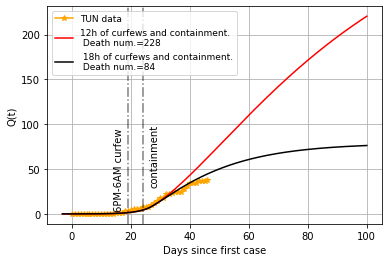

In [27]:
resSR = pd.concat([pd.DataFrame(res1),pd.DataFrame(res3_1)])
resCV = pd.concat([pd.DataFrame(res1),pd.DataFrame(res3_2)])
resCo = pd.concat([pd.DataFrame(res1),pd.DataFrame(res3_4)])
resCo_CV = pd.concat([pd.DataFrame(res1),pd.DataFrame(res3_3)])

time=np.concatenate((time1,time3_1))
############################################
#   Anglaise
#


fig, ax = plt.subplots()

ax.plot(np.arange(len(ddata.date)),ddata.deaths,c='orange',marker='*',label='TUN data')
#line0,=ax.plot(time [:len(res)],res[:,2]+res[:,3],c='r')
ax.plot(time,resSR[4],c='r',label='12h of curfews and containment.\n Death num.='+str(int(dd[0])))
ax.plot(time,resCV[4],label=' 18h of curfews and containment.\n Death num.='+str(int(dd[1])), c='black')
#line4,=ax.plot(time,resCo[3],label='pression de conf. aug. de 25%.\n Nbre décès='+str(dd[3]))
#line3,=ax.plot(time,resCo_CV[3],label='couvre-feu de 18h et pression \n de conf. aug. 25%.  Nbre décès='+str(dd[2]))

#ax.axvline(tmaxPerd1)

#ax.axvline(tmaxPerd2)

ax.axvline(time[(time<19+dt) * (time>19)], color='black', linestyle='-.', alpha=.5)
ax.axvline(time[(time<24+dt) * (time>24)], color='black', linestyle='-.', alpha=.5)

ax.text(16, 100, '6PM-6AM curfew ',
         rotation=90,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center',
          size=10)


ax.text(28, 100, 'containment',
         rotation=90,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center',
          size=10)


#line2,=ax.plot(bb[len(res1):],res2[:,2],label='periode 2')
#plt.plot(bb, aa[:,1])
plt.xlabel('Days since first case',fontsize=10)
plt.ylabel(r"Q(t)",fontsize=10)
#plt.title('Couvre-feu de 18h vs pression de confinement' )
ax.legend(loc='best',fontsize=9)
        #plt.savefig('../results/fig112.png', transparent=True)
ax.grid(True)
plt.show()
